In [1]:
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')

from sklearn import datasets

df = pd.read_csv("final_clusters.csv", index_col=0)
df.head()

,자치구,노인인구수,역개수,무료급식소개수,시설개수,평균소득
0,종로구,27704,15,5,8,5500.653548
1,중구,24660,23,2,11,5987.035233
2,용산구,38478,10,3,7,5550.348108
3,성동구,47530,14,5,19,4731.800000
4,광진구,53737,11,2,22,5643.548667


In [2]:
#Equalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled = sc.fit_transform(df.drop(columns="자치구"))
pd.DataFrame(scaled)

,0,1,2,3,4
0,-1.954359,0.641954,-0.387738,-1.764145,0.094798
1,-2.108383,1.900687,-1.173692,-1.492460,0.335343
2,-1.409203,-0.144754,-0.911707,-1.854707,0.119375
3,-0.951179,0.484612,-0.387738,-0.767965,-0.285446
4,-0.637109,0.012587,-1.173692,-0.496279,0.165468
5,-0.104906,-0.774121,-1.173692,0.681025,-0.770604
6,0.428157,-0.459438,1.184172,1.858330,-0.719037
7,0.554806,-0.302096,1.184172,0.047092,-0.671991
8,-0.008009,-1.246146,1.184172,0.681025,-0.851364
9,0.031054,-1.246146,-1.697662,0.137654,-0.781802


C:\Users\1119h\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\1119h\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\1119h\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


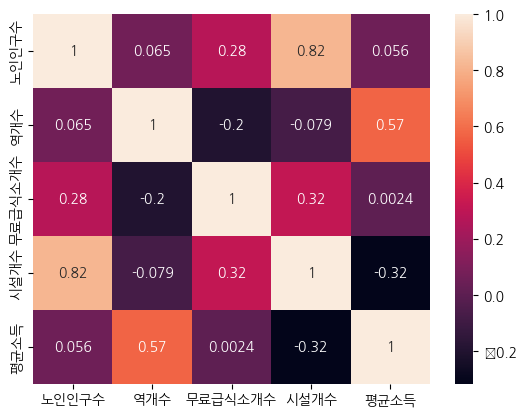

In [3]:
sns.heatmap(df.drop(columns='자치구').corr() , annot=True)

C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

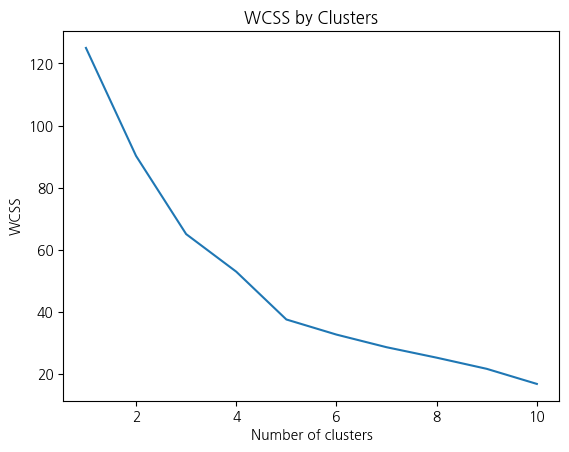

In [4]:
from sklearn.cluster import KMeans

%matplotlib inline

X = pd.DataFrame(scaled)

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
#K-Means Clustering
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3,random_state=0)

# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(X)

# Assign the cluster
X_withCluster = df.copy()
X_withCluster['km_clusters'] = km_clusters

C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1119h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram

clusters_single = linkage(y=scaled, method='single',metric='euclidean' )
clusters_average = linkage(y=scaled, method='average',metric='euclidean' )
clusters_complete = linkage(y=scaled, method='complete',metric='euclidean' )

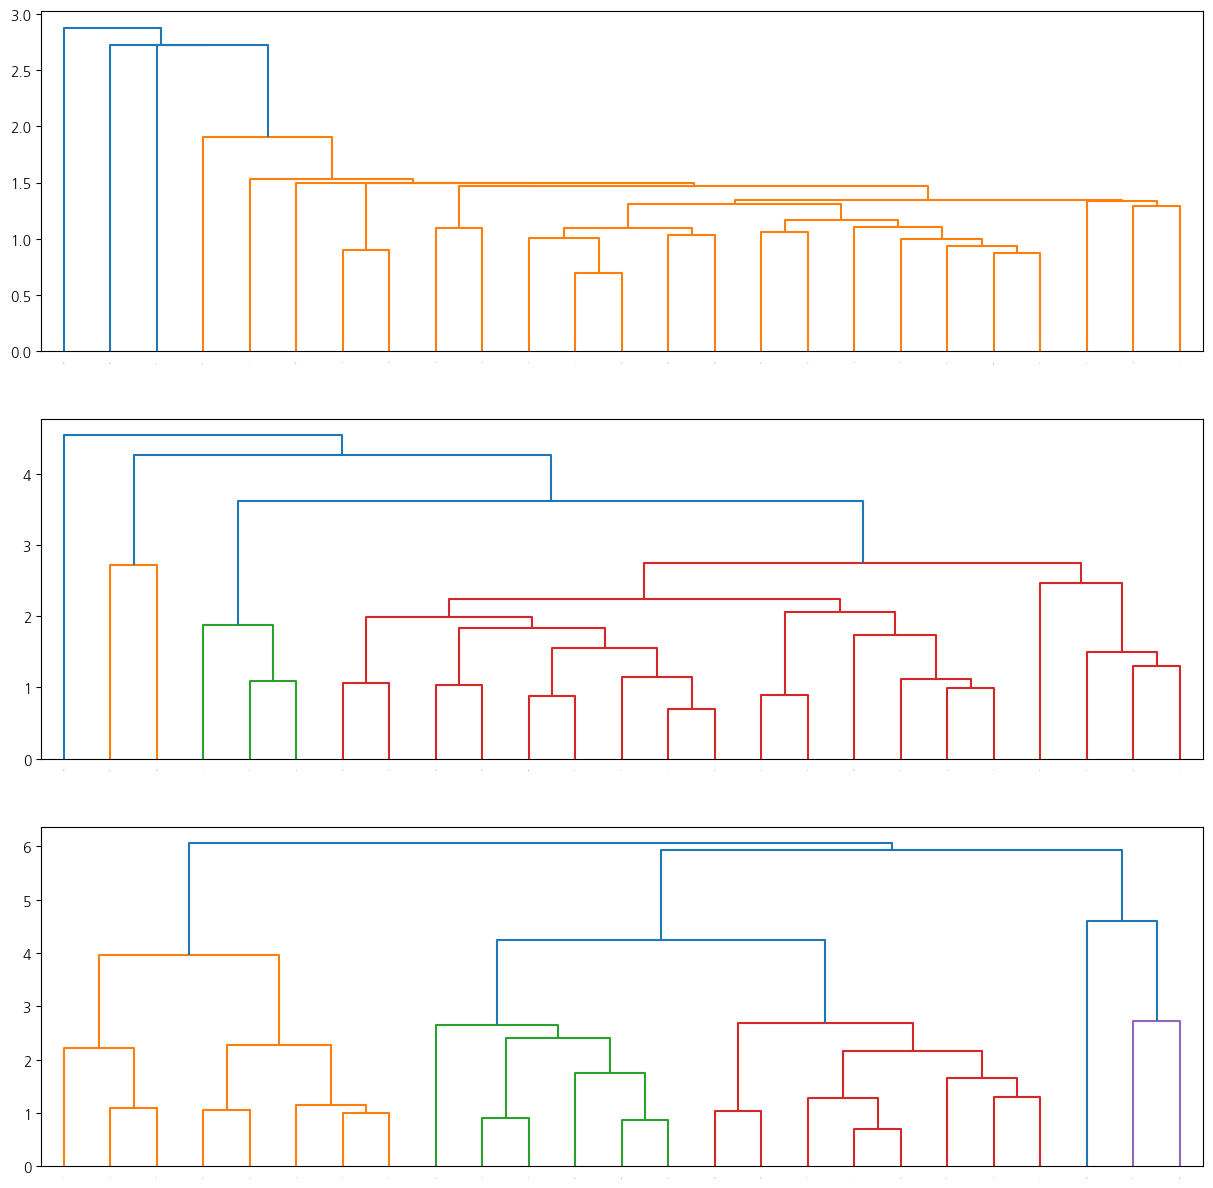

In [7]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15,15)

ax1 = dendrogram(clusters_single, leaf_font_size=0, ax=axes[0])
ax2 = dendrogram(clusters_average, leaf_font_size=0, ax=axes[1])
ax3 = dendrogram(clusters_complete, leaf_font_size=0, ax=axes[2])

In [10]:
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4, linkage='average')
agg_clusters = agg_model.fit_predict(X)

X_withCluster['agg_clusters'] = agg_clusters
X_withCluster

,자치구,노인인구수,역개수,무료급식소개수,시설개수,평균소득,km_clusters,agg_clusters
0,종로구,27704,15,5,8,5500.653548,1,1
1,중구,24660,23,2,11,5987.035233,1,1
2,용산구,38478,10,3,7,5550.348108,1,1
3,성동구,47530,14,5,19,4731.800000,1,0
4,광진구,53737,11,2,22,5643.548667,1,0
5,동대문구,64255,6,2,35,3750.812000,0,0
6,중랑구,74790,8,11,48,3855.080000,0,0
7,성북구,77293,9,11,28,3950.206275,0,0
8,강북구,66170,3,11,35,3587.515714,0,0
9,도봉구,66942,3,0,29,3728.169286,0,0


In [12]:
#PCA

from sklearn.decomposition import PCA
X = scaled.copy()

pca = PCA(n_components=2)

pca.fit(X)
x_pca = pca.transform(X)

#to DataFrame
pca_df = pd.DataFrame(x_pca)
pca_df['km_clusters'] = X_withCluster['km_clusters']
pca_df['agg_clusters'] = X_withCluster['agg_clusters']
pca_df.head()

,0,1,km_clusters,agg_clusters
0,2.541335,-0.582470,1,1
1,3.119876,0.332482,1,1
2,2.312628,-0.906767,1,1
3,1.199655,-0.374672,1,0
4,1.164680,-0.274214,1,0


C:\Users\1119h\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


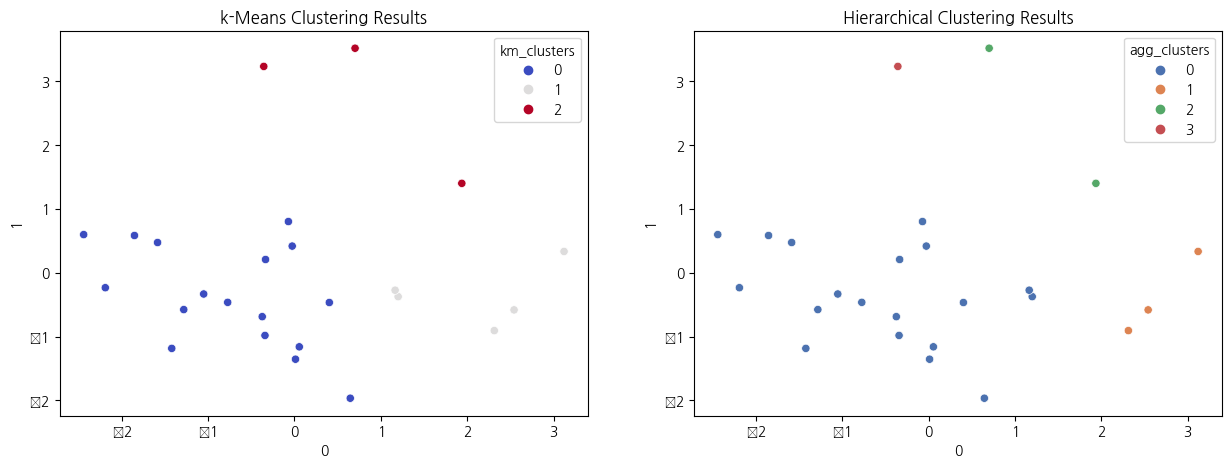

In [13]:
#Visualization

import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(x=0, y=1, data=pca_df, hue='km_clusters', palette='coolwarm', ax=ax[0])
sns.scatterplot(x=0, y=1, data=pca_df, hue='agg_clusters', palette='deep', ax=ax[1])

ax[0].set(title='k-Means Clustering Results')
ax[1].set(title='Hierarchical Clustering Results')

plt.show()

In [41]:
X_withCluster.to_csv("cluster_label.csv", index = False)